In [13]:
import pandas as pd   
import numpy as np
import matplotlib.pylab as plt  
import seaborn as sns   

__Cargo el el archivo'SN_Valencia.csv' en el DF y se analizan los valores nulos en cada columna. También se muestra la información general del DataFrame, incluyendo el número de filas, columnas y tipos de datos.__

In [42]:
data= pd.read_csv('Sin_Nulos_Valencia.csv')

In [43]:
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0.1                                       0
Unnamed: 0                                         0
identificación                                     0
fuente                                             0
nombre                                             0
descripción                                        0
descripción general del vecindario                 0
id_host                                            0
nombre_host                                        0
tiempo_respuesta_host                              0
tasa_respuesta_host                                0
tasa_de_aceptación_host                            0
host_is_superhost                                  0
barrio_limpio                                      0
grupo_vecindario_limpiado                          0
latitud                                            0
longitud                                           0
tipo_propiedad                                     0
tipo_habitación                               

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 52 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0.1                                     9447 non-null   int64  
 1   Unnamed: 0                                       9447 non-null   int64  
 2   identificación                                   9447 non-null   float64
 3   fuente                                           9447 non-null   object 
 4   nombre                                           9447 non-null   object 
 5   descripción                                      9447 non-null   object 
 6   descripción general del vecindario               9447 non-null   object 
 7   id_host                                          9447 non-null   int64  
 8   nombre_host                                      9447 non-null   object 
 9   tiempo_respuesta_host         

__Hice el análisis de datos de Valencia, primero se separé las variables en cualitativas y cuantitativas. Después un diagrama de caja para visualizar los valores atípicos en las variables cuantitativas. Elimino estos valores atípicos con los límites superior e inferior permitidos utilizando la desviación estándar. Luego, se filtran los datos para conservar sólo los que se encuentran dentro de los límites.Después de eliminar los valores atípicos, identificamos los valores nulos dentro del conjunto de datos. Eso sirvió para verificar que los datos están limpios, sin la influencia de valores atípicos extremos.__  


In [45]:
cualitativas = data.select_dtypes(include=['object'])
cuantitativas = data.select_dtypes(include=['int64', 'float64'])


<Figure size 1500x800 with 0 Axes>

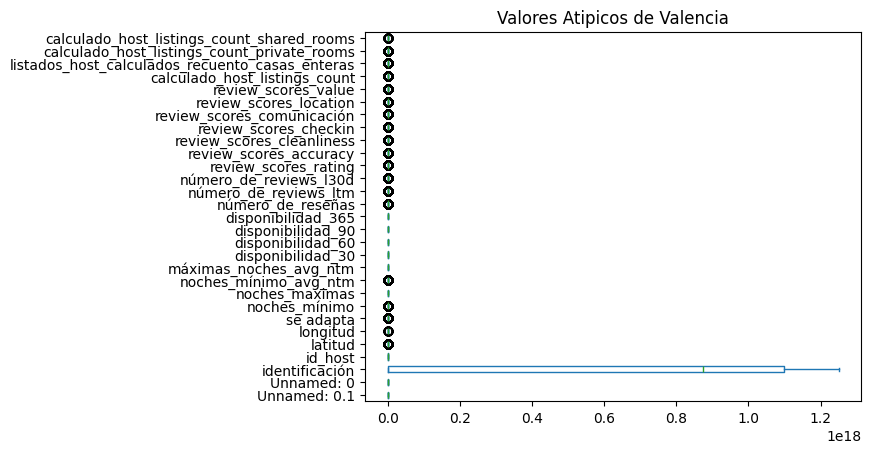

In [46]:
fig= plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atipicos de Valencia")
plt.show() #dibujamos el diagrama


In [47]:
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Unnamed: 0.1                                       1.290477e+04
Unnamed: 0                                         1.290477e+04
identificación                                     2.131769e+18
id_host                                            8.716503e+08
latitud                                            3.953329e+01
longitud                                          -2.938217e-01
se adapta                                          9.215348e+00
noches_mínimo                                      6.088035e+01
noches_maximas                                     1.697363e+03
noches_mínimo_avg_ntm                              6.107730e+01
máximas_noches_avg_ntm                             1.903949e+03
disponibilidad_30                                  3.961145e+01
disponibilidad_60                                  8.509675e+01
disponibilidad_90                                  1.317175e+02
disponibilidad_365                                 5.364467e+02
número_de_rese

In [48]:
data2= cuantitativas[(y<=Limite_Superior) & (y>=Limite_Inferior)]
data2

,Unnamed: 0.1,Unnamed: 0,identificación,id_host,latitud,longitud,se adapta,noches_mínimo,noches_maximas,noches_mínimo_avg_ntm,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_comunicación,review_scores_location,review_scores_value,calculado_host_listings_count,listados_host_calculados_recuento_casas_enteras,calculado_host_listings_count_private_rooms,calculado_host_listings_count_shared_rooms
0,0,0,4.815400e+04,219476,39.483750,-0.375020,4.0,3.0,25,3.3,...,4.68,4.63,4.84,4.79,4.51,4.52,4.0,4.0,0.0,0.0
1,1,1,1.371430e+05,670775,NaN,-0.319320,7.0,10.0,170,10.0,...,5.00,5.00,5.00,5.00,4.00,4.00,5.0,5.0,0.0,0.0
2,2,2,1.497150e+05,5947,39.467460,-0.328130,NaN,2.0,1125,2.1,...,4.70,4.55,4.84,4.89,4.60,4.63,1.0,1.0,0.0,0.0
3,3,3,1.659710e+05,791187,39.467900,-0.382060,5.0,5.0,10,5.0,...,4.90,4.88,4.89,4.87,4.84,4.85,6.0,6.0,0.0,0.0
4,4,4,1.692840e+05,806645,39.467590,-0.390670,3.0,2.0,1125,2.0,...,4.64,4.44,4.74,4.78,4.52,4.41,8.0,5.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9442,9442,9442,1.250000e+18,576254600,39.462380,-0.374780,1.0,31.0,365,31.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.0,1.0,0.0
9443,9443,9443,1.250000e+18,569472969,39.475829,-0.378946,1.0,20.0,335,20.0,...,0.00,0.00,0.00,0.00,0.00,0.00,7.0,7.0,0.0,0.0
9444,9444,9444,1.250000e+18,139048962,39.463742,-0.356904,2.0,1.0,5,1.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.0,1.0,0.0
9445,9445,9445,1.250000e+18,438136382,39.478385,-0.384523,2.0,1.0,365,30.0,...,0.00,0.00,0.00,0.00,0.00,0.00,2.0,2.0,0.0,0.0


In [49]:
valores_nulos=data2.isnull().sum()
valores_nulos

Unnamed: 0.1                                         0
Unnamed: 0                                           0
identificación                                       0
id_host                                              0
latitud                                            156
longitud                                            70
se adapta                                           94
noches_mínimo                                       65
noches_maximas                                       0
noches_mínimo_avg_ntm                               75
máximas_noches_avg_ntm                               0
disponibilidad_30                                    0
disponibilidad_60                                    0
disponibilidad_90                                    0
disponibilidad_365                                   0
número_de_reseñas                                  260
número_de_reviews_ltm                              150
número_de_reviews_l30d                             175
review_sco

In [50]:
data_clean=data2.copy()
data_clean=data_clean.fillna(round(data2.mean(),1))
data_clean

,Unnamed: 0.1,Unnamed: 0,identificación,id_host,latitud,longitud,se adapta,noches_mínimo,noches_maximas,noches_mínimo_avg_ntm,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_comunicación,review_scores_location,review_scores_value,calculado_host_listings_count,listados_host_calculados_recuento_casas_enteras,calculado_host_listings_count_private_rooms,calculado_host_listings_count_shared_rooms
0,0,0,4.815400e+04,219476,39.483750,-0.375020,4.0,3.0,25,3.3,...,4.68,4.63,4.84,4.79,4.51,4.52,4.0,4.0,0.0,0.0
1,1,1,1.371430e+05,670775,39.500000,-0.319320,7.0,10.0,170,10.0,...,5.00,5.00,5.00,5.00,4.00,4.00,5.0,5.0,0.0,0.0
2,2,2,1.497150e+05,5947,39.467460,-0.328130,3.4,2.0,1125,2.1,...,4.70,4.55,4.84,4.89,4.60,4.63,1.0,1.0,0.0,0.0
3,3,3,1.659710e+05,791187,39.467900,-0.382060,5.0,5.0,10,5.0,...,4.90,4.88,4.89,4.87,4.84,4.85,6.0,6.0,0.0,0.0
4,4,4,1.692840e+05,806645,39.467590,-0.390670,3.0,2.0,1125,2.0,...,4.64,4.44,4.74,4.78,4.52,4.41,8.0,5.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9442,9442,9442,1.250000e+18,576254600,39.462380,-0.374780,1.0,31.0,365,31.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.0,1.0,0.0
9443,9443,9443,1.250000e+18,569472969,39.475829,-0.378946,1.0,20.0,335,20.0,...,0.00,0.00,0.00,0.00,0.00,0.00,7.0,7.0,0.0,0.0
9444,9444,9444,1.250000e+18,139048962,39.463742,-0.356904,2.0,1.0,5,1.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.0,1.0,0.0
9445,9445,9445,1.250000e+18,438136382,39.478385,-0.384523,2.0,1.0,365,30.0,...,0.00,0.00,0.00,0.00,0.00,0.00,2.0,2.0,0.0,0.0


In [51]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

Unnamed: 0.1                                       0
Unnamed: 0                                         0
identificación                                     0
id_host                                            0
latitud                                            0
longitud                                           0
se adapta                                          0
noches_mínimo                                      0
noches_maximas                                     0
noches_mínimo_avg_ntm                              0
máximas_noches_avg_ntm                             0
disponibilidad_30                                  0
disponibilidad_60                                  0
disponibilidad_90                                  0
disponibilidad_365                                 0
número_de_reseñas                                  0
número_de_reviews_ltm                              0
número_de_reviews_l30d                             0
review_scores_rating                          

AHORA LO HACEMOS POR CUARTILES

In [52]:
cuantitativas_DE=pd.concat([data_clean])
cuantitativas_DE

,Unnamed: 0.1,Unnamed: 0,identificación,id_host,latitud,longitud,se adapta,noches_mínimo,noches_maximas,noches_mínimo_avg_ntm,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_comunicación,review_scores_location,review_scores_value,calculado_host_listings_count,listados_host_calculados_recuento_casas_enteras,calculado_host_listings_count_private_rooms,calculado_host_listings_count_shared_rooms
0,0,0,4.815400e+04,219476,39.483750,-0.375020,4.0,3.0,25,3.3,...,4.68,4.63,4.84,4.79,4.51,4.52,4.0,4.0,0.0,0.0
1,1,1,1.371430e+05,670775,39.500000,-0.319320,7.0,10.0,170,10.0,...,5.00,5.00,5.00,5.00,4.00,4.00,5.0,5.0,0.0,0.0
2,2,2,1.497150e+05,5947,39.467460,-0.328130,3.4,2.0,1125,2.1,...,4.70,4.55,4.84,4.89,4.60,4.63,1.0,1.0,0.0,0.0
3,3,3,1.659710e+05,791187,39.467900,-0.382060,5.0,5.0,10,5.0,...,4.90,4.88,4.89,4.87,4.84,4.85,6.0,6.0,0.0,0.0
4,4,4,1.692840e+05,806645,39.467590,-0.390670,3.0,2.0,1125,2.0,...,4.64,4.44,4.74,4.78,4.52,4.41,8.0,5.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9442,9442,9442,1.250000e+18,576254600,39.462380,-0.374780,1.0,31.0,365,31.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.0,1.0,0.0
9443,9443,9443,1.250000e+18,569472969,39.475829,-0.378946,1.0,20.0,335,20.0,...,0.00,0.00,0.00,0.00,0.00,0.00,7.0,7.0,0.0,0.0
9444,9444,9444,1.250000e+18,139048962,39.463742,-0.356904,2.0,1.0,5,1.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.0,1.0,0.0
9445,9445,9445,1.250000e+18,438136382,39.478385,-0.384523,2.0,1.0,365,30.0,...,0.00,0.00,0.00,0.00,0.00,0.00,2.0,2.0,0.0,0.0


<Figure size 1500x800 with 0 Axes>

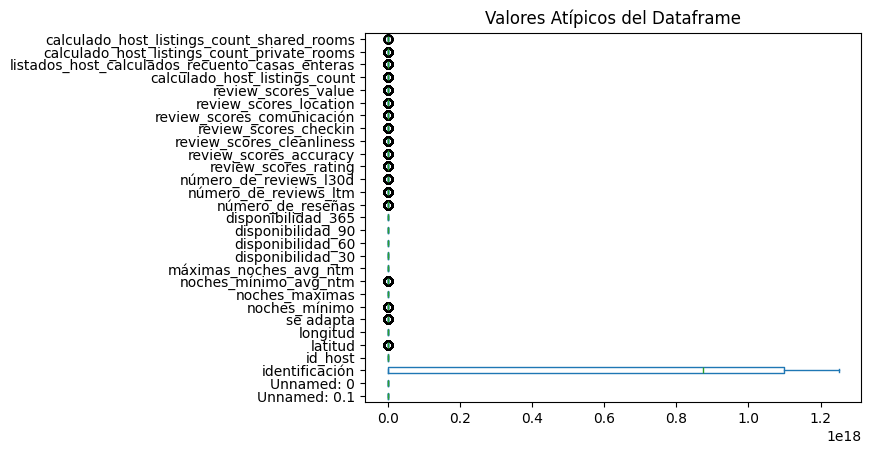

In [53]:
fig= plt.figure (figsize=(15,8))
cuantitativas_DE.plot(kind="box", vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [54]:
y=cuantitativas
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitidos", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)


Limite superior permitidos Unnamed: 0.1                                       1.416900e+04
Unnamed: 0                                         1.416900e+04
identificación                                     2.750000e+18
id_host                                            1.064320e+09
latitud                                            3.949535e+01
longitud                                          -2.889202e-01
se adapta                                          7.000000e+00
noches_mínimo                                      8.500000e+00
noches_maximas                                     2.632500e+03
noches_mínimo_avg_ntm                              9.000000e+00
máximas_noches_avg_ntm                             2.317500e+03
disponibilidad_30                                  3.950000e+01
disponibilidad_60                                  9.400000e+01
disponibilidad_90                                  1.410000e+02
disponibilidad_365                                 6.282500e+02
número_de_res

In [55]:
data2_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr

,Unnamed: 0.1,Unnamed: 0,identificación,id_host,latitud,longitud,se adapta,noches_mínimo,noches_maximas,noches_mínimo_avg_ntm,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_comunicación,review_scores_location,review_scores_value,calculado_host_listings_count,listados_host_calculados_recuento_casas_enteras,calculado_host_listings_count_private_rooms,calculado_host_listings_count_shared_rooms
0,0,0,4.815400e+04,219476,39.483750,-0.375020,4.0,3.0,25,3.3,...,4.68,4.63,4.84,4.79,4.51,4.52,4.0,4.0,0.0,0.0
1,1,1,1.371430e+05,670775,NaN,-0.319320,7.0,NaN,170,NaN,...,5.00,5.00,5.00,5.00,4.00,4.00,5.0,5.0,0.0,0.0
2,2,2,1.497150e+05,5947,39.467460,-0.328130,NaN,2.0,1125,2.1,...,4.70,4.55,4.84,4.89,4.60,4.63,1.0,1.0,0.0,0.0
3,3,3,1.659710e+05,791187,39.467900,-0.382060,5.0,5.0,10,5.0,...,4.90,4.88,4.89,4.87,4.84,4.85,6.0,6.0,0.0,0.0
4,4,4,1.692840e+05,806645,39.467590,-0.390670,3.0,2.0,1125,2.0,...,4.64,4.44,4.74,4.78,4.52,4.41,8.0,5.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9442,9442,9442,1.250000e+18,576254600,39.462380,-0.374780,1.0,NaN,365,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0
9443,9443,9443,1.250000e+18,569472969,39.475829,-0.378946,1.0,NaN,335,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.0,0.0
9444,9444,9444,1.250000e+18,139048962,39.463742,-0.356904,2.0,1.0,5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0
9445,9445,9445,1.250000e+18,438136382,39.478385,-0.384523,2.0,1.0,365,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,0.0


In [56]:
valores_nulos=data2_iqr.isnull().sum()
valores_nulos

Unnamed: 0.1                                          0
Unnamed: 0                                            0
identificación                                        0
id_host                                               0
latitud                                             403
longitud                                             47
se adapta                                           348
noches_mínimo                                      1320
noches_maximas                                        0
noches_mínimo_avg_ntm                              1576
máximas_noches_avg_ntm                                0
disponibilidad_30                                     0
disponibilidad_60                                     0
disponibilidad_90                                     0
disponibilidad_365                                    0
número_de_reseñas                                  1052
número_de_reviews_ltm                               441
número_de_reviews_l30d                          

In [57]:
data3_iqr=data2_iqr.copy()
data3_iqr=data3_iqr.fillna(round(data2_iqr.mean(),1))

In [58]:
Datos_limpios=pd.concat([cualitativas, data3_iqr], axis=1)
Datos_limpios

,fuente,nombre,descripción,descripción general del vecindario,nombre_host,tiempo_respuesta_host,tasa_respuesta_host,tasa_de_aceptación_host,host_is_superhost,barrio_limpio,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_comunicación,review_scores_location,review_scores_value,calculado_host_listings_count,listados_host_calculados_recuento_casas_enteras,calculado_host_listings_count_private_rooms,calculado_host_listings_count_shared_rooms
0,city scrape,Precioso apartamento con wifi,Second floor on a farm from the late 19th cent...,Very close neighborhood to the city's old town...,Antonio,within a few hours,100%,93%,f,MORVEDRE,...,4.68,4.63,4.84,4.79,4.51,4.52,4.0,4.0,0.0,0.0
1,city scrape,PENTHOUSE ON FRONT LINE BEACH,Sin descripción,No cuenta con una,Cpi GestiÃ³n Encuentra Tu MansiÃ³n,within an hour,100%,93%,f,EL SALER,...,5.00,5.00,5.00,5.00,4.00,4.00,5.0,5.0,0.0,0.0
2,city scrape,1900 Style Valencian Beach Home for 10px,Typical town house with 5 bedrooms and 4 bathr...,"Surrounded by historic houses, authentic res...",Susana Barbara,within an hour,100%,100%,f,CABANYAL-CANYAMELAR,...,4.70,4.55,4.84,4.89,4.60,4.63,1.0,1.0,0.0,0.0
3,city scrape,â˜… Architectural touch! â˜…,"Hola! I am ready to welcome you in my apt., wh...",Just outside the old city centre (one block aw...,InÃ©s,within an hour,86%,100%,No mencionado,LA ROQUETA,...,4.90,4.88,4.89,4.87,4.84,4.85,6.0,6.0,0.0,0.0
4,city scrape,Apartment near downtown,Sin descripción,It's a neighborhood with all amenities. 200 me...,Maria Jesus,within an hour,93%,80%,f,NOU MOLES,...,4.64,4.44,4.74,4.78,4.52,4.41,8.0,5.0,0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9442,city scrape,Preciosa habitaciÃ³n en Ruzafa en piso compartido,Sin descripción,No cuenta con una,Hugo,No mentioned,0,0,f,RUSSAFA,...,4.80,4.70,4.80,4.80,4.70,4.60,1.0,0.0,1.0,0.0
9443,city scrape,Spirit of Mercat 1 - Chic Studio,Spirit of Mercat 1 offers everything for you t...,No cuenta con una,Hugo Adrian,within an hour,100%,75%,f,LA SEU,...,4.80,4.70,4.80,4.80,4.70,4.60,7.0,7.0,0.0,0.0
9444,city scrape,"The Nest, a high top floor",Make some memories at this unique and family-f...,No cuenta con una,Cesar,No mentioned,0,0,f,PENYA-ROJA,...,4.80,4.70,4.80,4.80,4.70,4.60,1.0,0.0,1.0,0.0
9445,city scrape,Turia II,"This modern and bright apartment, located on t...",No cuenta con una,Home Club,within a day,60%,46%,f,EL BOTANIC,...,4.80,4.70,4.80,4.80,4.70,4.60,2.0,2.0,0.0,0.0


In [59]:
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

fuente                                             0
nombre                                             0
descripción                                        0
descripción general del vecindario                 0
nombre_host                                        0
tiempo_respuesta_host                              0
tasa_respuesta_host                                0
tasa_de_aceptación_host                            0
host_is_superhost                                  0
barrio_limpio                                      0
grupo_vecindario_limpiado                          0
tipo_propiedad                                     0
tipo_habitación                                    0
baños                                              0
dormitorios                                        0
camas                                              0
comodidades                                        0
precio                                             0
tiene_disponibilidad                          

In [60]:
data.to_csv("Atipicos_Valencia.csv")